In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from data_generation import Three_body_2D_Rick
from data_generation import tbp_util
from data_generation.tbp_energy_calculations import visualize_dataset
from tensorflow import keras
import os

keras.backend.set_floatx('float64')
keras.backend.floatx()

# Testing the final models

Final models are tested against a uniquely generated data set of 10 trajectories and against 4 'special' periodic trajectories.

Code is mostly copied from experiment_2_sweep.ipynb


In [ ]:
experiments = {
    "Experiment_3_0": {
        "notes": "just a test to see if the system is functioning properly before investing a lot of time",
        "max_datasets": 63,
        "prediction_offset": 10,  # predict t time steps ahead
        "batch_size": 64,
        "epochs": 3,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 1,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_3_2": {
        "notes": "Continues where Experiment_2 left off, more epochs!",
        "max_datasets": 102,
        "prediction_offset": 10,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 160,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 1,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_3_2_4": {
        "notes": "Continues where Experiment_2_4 left off, more epochs!",
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 160,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 256,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 5,
            "delta_scaling_factor": 10000
        }
    }
}

In [17]:
test_configurations = ['periodic', 'tests']
test_configurations = ['test_set_3']

In [18]:
# todo read from config file
# also see tbp_util.py
G = 1.0
M = np.array([1.0, 1.0, 1.0])

testing Experiment_3_2

Setting test_set_3 as the configuration to load trajectories from
loaded 0 datasets
256 160 0.1 0.0001
977/977 [==============================] - 3s 3ms/step - loss: 0.2486 - mae: 0.2486 - mse: 21.9941
[0.24864025054145267, 0.24864025054145267, 21.99405088371588]
limit: 25000
i: 24998
trajectory mae: 0.05219528737946844
[[ 1.         -0.00494827 -0.99505173]
 [ 0.99999865 -0.00494766 -0.99505093]
 [ 0.99999729 -0.00494705 -0.99505012]
 ...
 [ 0.24506117 -0.9925057   0.75435884]
 [ 0.24500909 -0.99251587  0.75442124]
 [ 0.24495699 -0.99252602  0.75448363]]


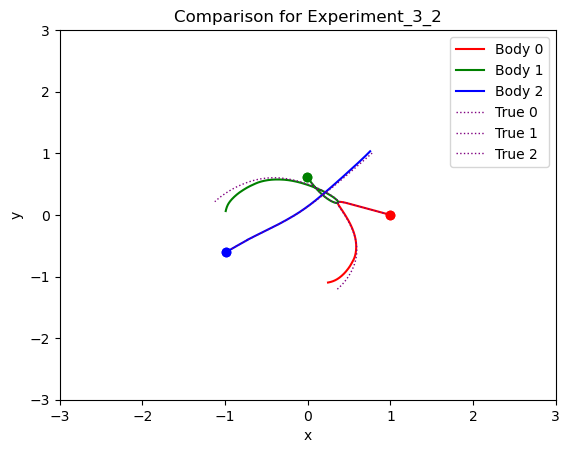

limit: 25000
i: 24998
trajectory mae: 0.13497114374760485
[[ 1.         -0.27324666 -0.72675334]
 [ 0.99999947 -0.27324656 -0.72675284]
 [ 0.99999894 -0.27324646 -0.72675235]
 ...
 [-0.25910844 -0.78727443  1.05490049]
 [-0.2591711  -0.78727537  1.05496419]
 [-0.25923376 -0.78727631  1.05502789]]


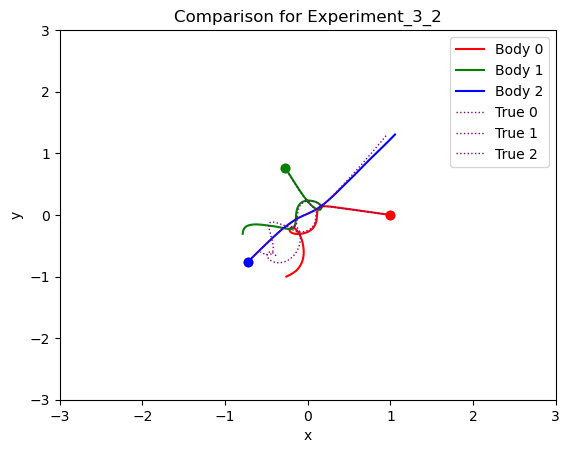

limit: 25000
i: 24998
trajectory mae: 0.06143827270310043
[[ 1.         -0.05672348 -0.94327652]
 [ 0.99999936 -0.05672339 -0.94327593]
 [ 0.99999872 -0.05672329 -0.94327535]
 ...
 [ 0.54512759 -0.47085705 -0.06588473]
 [ 0.5451991  -0.47081978 -0.06599359]
 [ 0.54527061 -0.47078251 -0.06610247]]


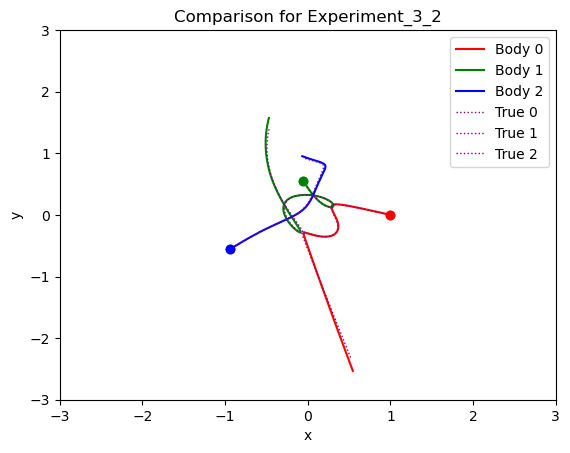

limit: 25000
i: 24998
trajectory mae: 0.2869682773860246
[[ 1.         -0.05838238 -0.94161762]
 [ 1.00000051 -0.05838331 -0.94161712]
 [ 1.000001   -0.05838423 -0.94161661]
 ...
 [ 0.47398299 -0.13618114 -0.32717642]
 [ 0.47396505 -0.1361316  -0.32720803]
 [ 0.47394706 -0.136082   -0.32723965]]


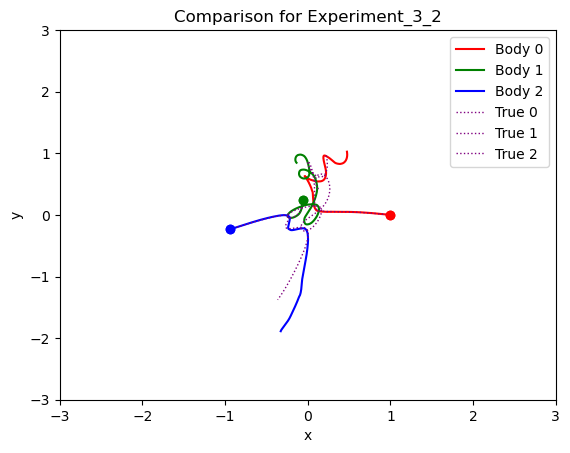

limit: 25000
i: 24998
trajectory mae: 0.19863824416140882
[[ 1.         -0.08563267 -0.91436733]
 [ 0.99999837 -0.08563223 -0.91436611]
 [ 0.99999673 -0.08563179 -0.91436488]
 ...
 [-0.77400943  0.60926571  0.1712551 ]
 [-0.77405165  0.60930223  0.17126077]
 [-0.77409386  0.60933875  0.17126645]]


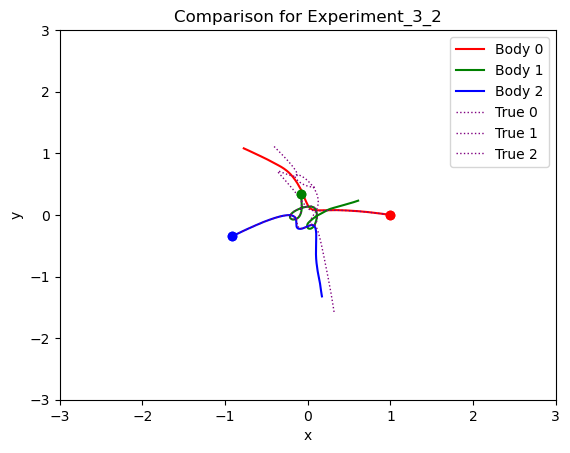

limit: 25000
i: 24998
trajectory mae: 0.11876367205203996
[[ 1.         -0.19273348 -0.80726652]
 [ 0.99999914 -0.19273307 -0.80726602]
 [ 0.99999827 -0.19273266 -0.80726552]
 ...
 [-0.35735127 -0.55622484  0.9220918 ]
 [-0.35741527 -0.55620948  0.92214053]
 [-0.35747927 -0.55619411  0.92218926]]


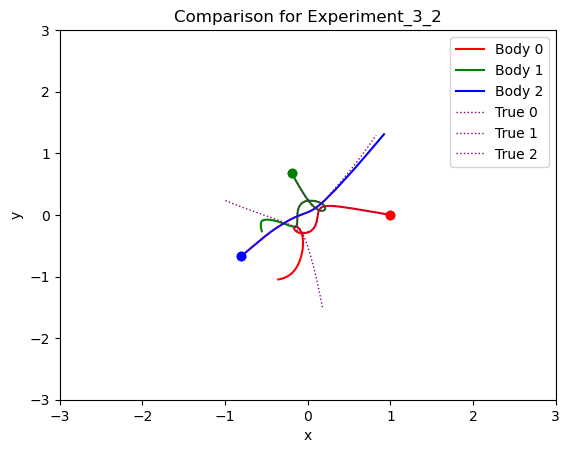

limit: 25000
i: 24998
trajectory mae: 0.10267070486123439
[[ 1.         -0.31543759 -0.68456241]
 [ 0.99999874 -0.31543673 -0.68456196]
 [ 0.99999749 -0.31543586 -0.68456151]
 ...
 [-1.90103785  0.92792752  0.98097569]
 [-1.90113708  0.9280925   0.98090988]
 [-1.90123627  0.92825763  0.98084389]]


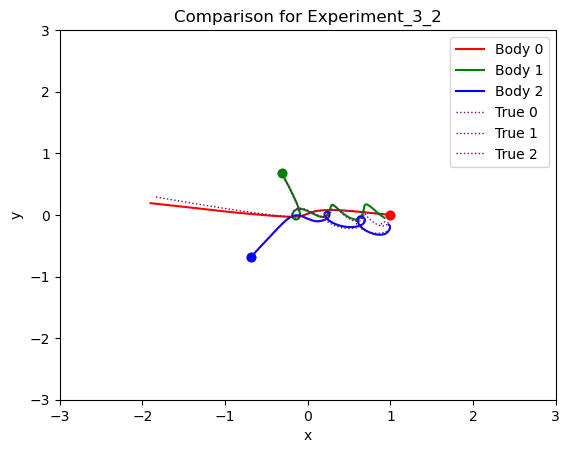

limit: 25000
i: 24998
trajectory mae: 0.12946108903176384
[[ 1.         -0.05977845 -0.94022155]
 [ 0.99999938 -0.05977861 -0.94022071]
 [ 0.99999876 -0.05977878 -0.94021987]
 ...
 [ 0.03460839  0.10010982 -0.12629301]
 [ 0.0346285   0.10011651 -0.12631974]
 [ 0.03464865  0.10012314 -0.12634647]]


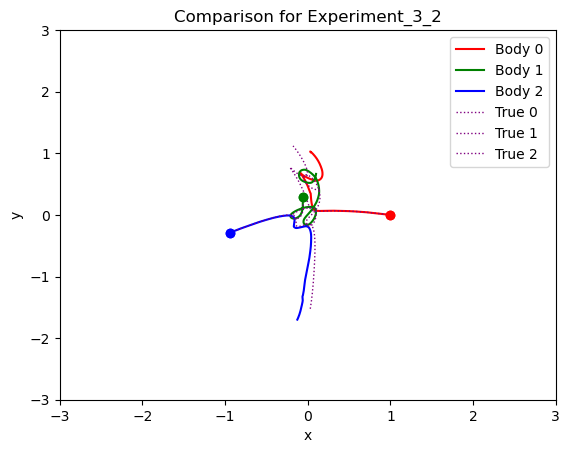

limit: 25000
i: 24998
trajectory mae: 0.07658204513980627
[[ 1.         -0.26559447 -0.73440553]
 [ 0.99999928 -0.26559418 -0.73440503]
 [ 0.99999855 -0.26559388 -0.73440452]
 ...
 [-0.13550349 -0.78768898  0.93331052]
 [-0.13552319 -0.78773117  0.93337246]
 [-0.13554289 -0.78777336  0.9334344 ]]


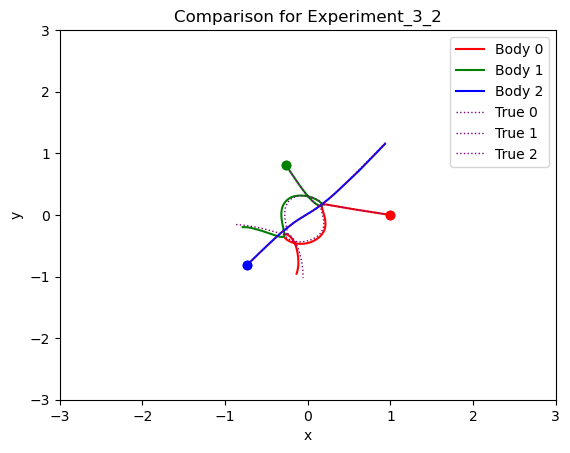

limit: 25000
i: 24998
trajectory mae: 0.0655071252742504
[[ 1.         -0.03255891 -0.96744109]
 [ 0.99999811 -0.03255789 -0.96744016]
 [ 0.99999621 -0.03255687 -0.96743923]
 ...
 [ 0.68446003 -1.51371745  0.8365562 ]
 [ 0.68445811 -1.51381386  0.83665474]
 [ 0.68445619 -1.51391027  0.83675328]]


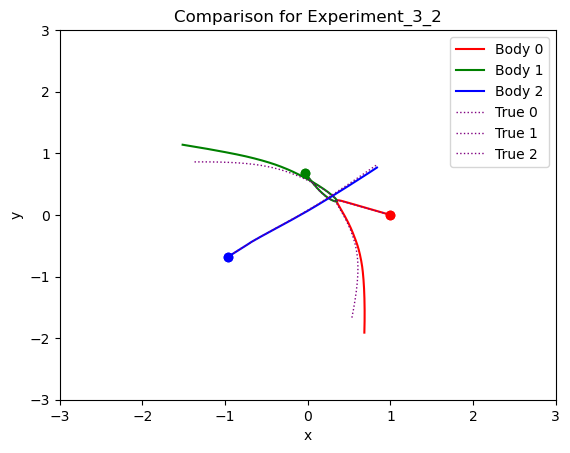

loaded 0 datasets
testing Experiment_3_2_4

Setting test_set_3 as the configuration to load trajectories from
loaded 0 datasets
256 160 0.1 0.0001
977/977 [==============================] - 7s 7ms/step - loss: 2.4154 - mae: 2.4154 - mse: 1715.0571
[2.4154138482406697, 2.4154138482406697, 1715.0570668880441]
limit: 2500
i: 2498
trajectory mae: 0.10182042152383802
[[ 1.         -0.00494827 -0.99505173]
 [ 0.99999949 -0.00494765 -0.99505032]
 [ 0.99999841 -0.00494681 -0.99504855]
 ...
 [ 0.13607396 -0.7823989   0.65918822]
 [ 0.13543382 -0.78234334  0.6597753 ]
 [ 0.13479319 -0.78228699  0.66036207]]


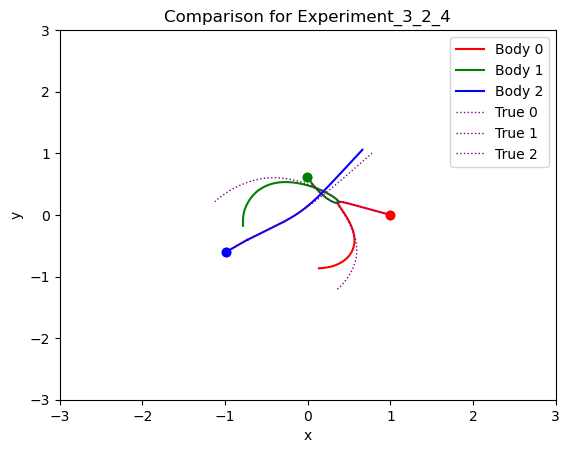

limit: 2500
i: 2498
trajectory mae: 0.08268636835694651
[[ 1.         -0.27324666 -0.72675334]
 [ 0.99999777 -0.27324459 -0.72675193]
 [ 0.99999498 -0.2732423  -0.72675018]
 ...
 [-0.46095345 -0.44844348  0.93288379]
 [-0.46159717 -0.44828337  0.93338665]
 [-0.46223082 -0.44813335  0.93389036]]


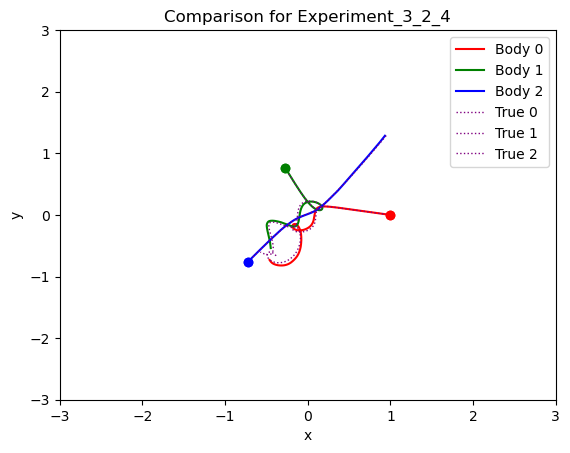

limit: 2500
i: 2498
trajectory mae: 0.11201028802753106
[[ 1.         -0.05672348 -0.94327652]
 [ 0.99999594 -0.05671983 -0.94327471]
 [ 0.99999135 -0.05671602 -0.94327253]
 ...
 [ 0.47957838 -0.1006843  -0.35134474]
 [ 0.48013757 -0.10117905 -0.35142048]
 [ 0.48069639 -0.10168115 -0.35148847]]


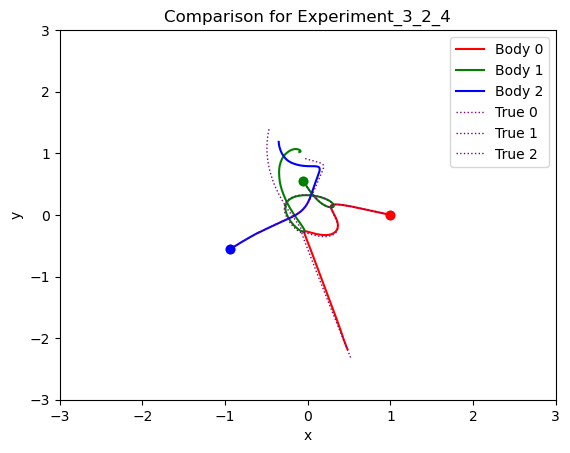

limit: 2500
i: 2498
trajectory mae: 0.23215804708990306
[[ 1.         -0.05838238 -0.94161762]
 [ 1.00000605 -0.0583833  -0.9416208 ]
 [ 1.00001138 -0.05838417 -0.94162331]
 ...
 [-0.0697205   0.12799774 -0.0195035 ]
 [-0.07003495  0.12836112 -0.01954813]
 [-0.07034814  0.12872338 -0.01959291]]


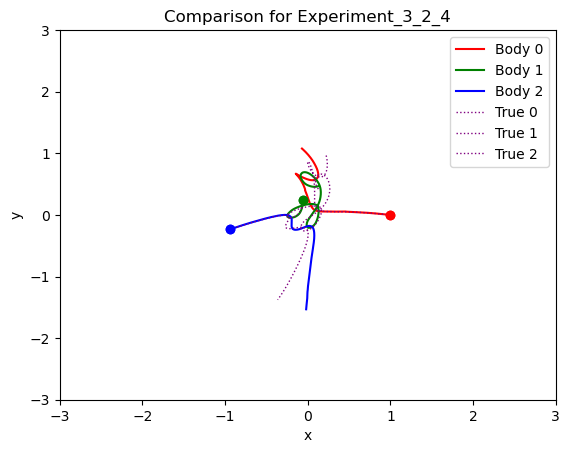

limit: 2500
i: 2498
trajectory mae: 0.12419660407300552
[[ 1.         -0.08563267 -0.91436733]
 [ 0.99999342 -0.08563034 -0.91436179]
 [ 0.9999861  -0.08562803 -0.91435548]
 ...
 [-0.40231357  0.02767022  0.42048498]
 [-0.4029201   0.02813482  0.42062993]
 [-0.40352621  0.02859893  0.42077494]]


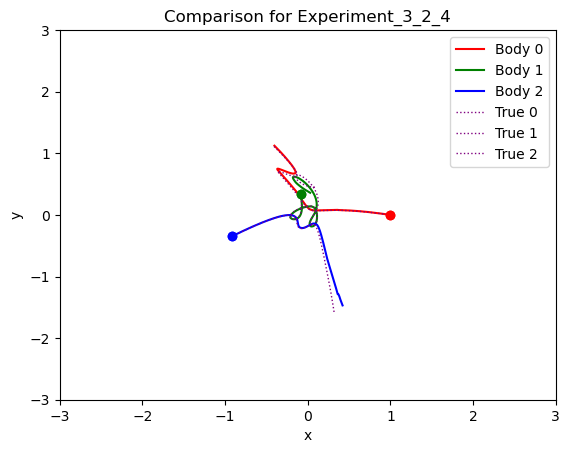

limit: 2500
i: 2498
trajectory mae: 0.14753636229558895
[[ 1.         -0.19273348 -0.80726652]
 [ 0.99999241 -0.19272987 -0.80726137]
 [ 0.99998428 -0.19272608 -0.80725587]
 ...
 [ 0.93306652 -1.78292536  0.87730632]
 [ 0.93390017 -1.78426464  0.87781567]
 [ 0.93473278 -1.78560217  0.87832432]]


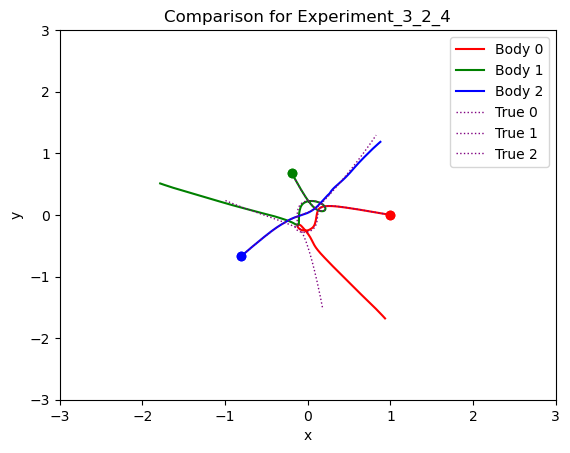

limit: 2500
i: 2498
trajectory mae: 0.15727993288006445
[[ 1.         -0.31543759 -0.68456241]
 [ 0.99999226 -0.31543268 -0.6845584 ]
 [ 0.99998402 -0.31542761 -0.68455405]
 ...
 [-1.72602574  0.78439129  0.95981342]
 [-1.72699667  0.7845393   0.96063797]
 [-1.72796753  0.78468757  0.96146218]]


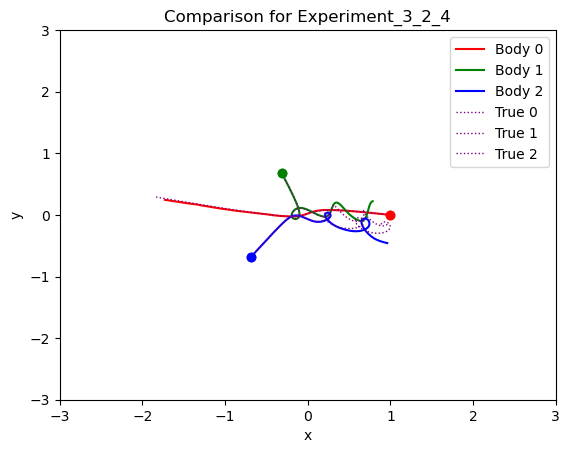

limit: 2500
i: 2498
trajectory mae: 0.08987175014110327
[[ 1.         -0.05977845 -0.94022155]
 [ 1.0000028  -0.05977826 -0.94022293]
 [ 1.00000478 -0.059778   -0.94022354]
 ...
 [-0.08187844  0.11488389  0.00638776]
 [-0.0822061   0.11526324  0.00634048]
 [-0.08253265  0.11564169  0.00629299]]


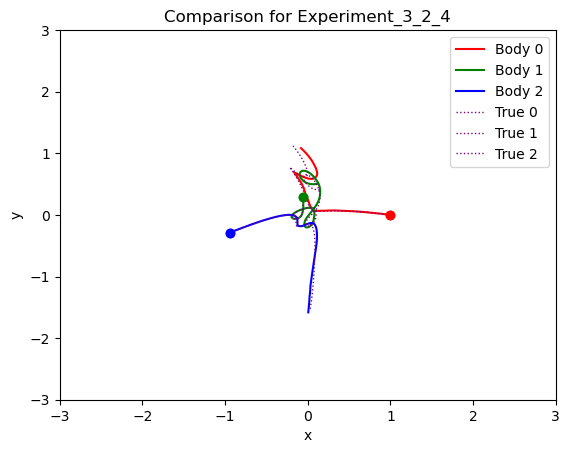

limit: 2500
i: 2498
trajectory mae: 0.08725452689681534
[[ 1.         -0.26559447 -0.73440553]
 [ 0.99999696 -0.26559127 -0.73440448]
 [ 0.99999338 -0.26558788 -0.73440309]
 ...
 [ 0.13896549 -0.99509319  0.8839029 ]
 [ 0.13923308 -0.99592339  0.88446918]
 [ 0.13950058 -0.99675351  0.88503547]]


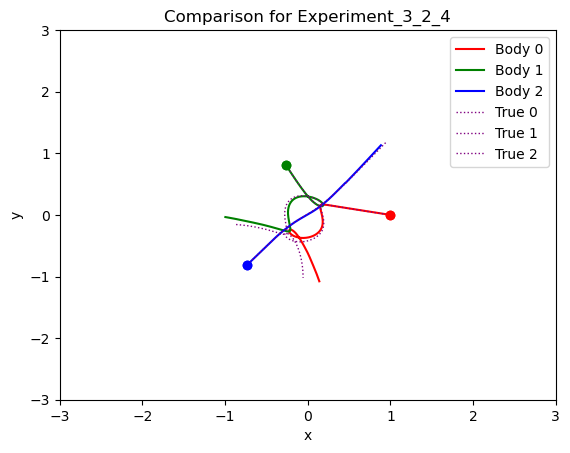

limit: 2500
i: 2498
trajectory mae: 0.06331164830334164
[[ 1.         -0.03255891 -0.96744109]
 [ 0.99999759 -0.03255581 -0.9674404 ]
 [ 0.99999454 -0.03255246 -0.96743932]
 ...
 [ 0.42421703 -1.2280151   0.81667217]
 [ 0.42397577 -1.22866488  0.81756472]
 [ 0.42373431 -1.2293141   0.81845691]]


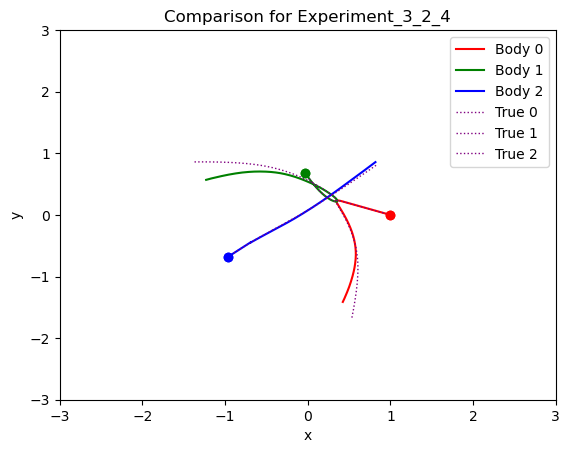

loaded 0 datasets


In [19]:

for experiment_id in list(experiments.keys())[1:]:
    print(f'testing {experiment_id}\n')

    for config_name in test_configurations:
        os.makedirs(f'./test_results/{config_name}', exist_ok=True)
        tbp_util.use_config(config_name)


        def get_deltas(x, y, vx, vy, delta=1, scaling_factor=1):
            dx = (x[:-delta] - x[delta:]) * scaling_factor
            dy = (y[:-delta] - y[delta:]) * scaling_factor
            dvx = (vx[:-delta] - vx[delta:]) * scaling_factor
            dvy = (vy[:-delta] - vy[delta:]) * scaling_factor
            return dx, dy, dvx, dvy


        max_datasets = experiments[experiment_id]['max_datasets']
        prediction_offset = experiments[experiment_id]['prediction_offset']
        downsample_factor = experiments[experiment_id]['dataset']['downsample_factor']
        dataset_index = experiments[experiment_id]['dataset']['dataset_index']
        scaling_factor = experiments[experiment_id]['dataset']['delta_scaling_factor']
        original_config_name = experiments[experiment_id]['dataset']['name']

        x_train = np.ndarray((0, 12), dtype=np.float64)
        y_train = np.ndarray((0, 12), dtype=np.float64)
        for dataset, x, y, vx, vy in tbp_util.load_datasets(limit=max_datasets):
            x = x[dataset_index:, :]
            y = y[dataset_index:, :]
            vx = vx[dataset_index:, :]
            vy = vy[dataset_index:, :]

            input_data = np.column_stack((x, y, vx, vy))
            input_data = input_data[:-prediction_offset:downsample_factor, :]

            deltas = get_deltas(x, y, vx, vy, delta=prediction_offset, scaling_factor=scaling_factor)
            output_data = np.column_stack(deltas)[::downsample_factor, :]

            x_train = np.concatenate((x_train, input_data))
            y_train = np.concatenate((y_train, output_data))
        assert x_train.shape == y_train.shape

        batch_size = experiments[experiment_id]['batch_size']
        epochs = experiments[experiment_id]['epochs']
        validation_split = experiments[experiment_id]['validation_split']
        learning_rate = experiments[experiment_id]['learning_rate']
        steps_per_epoch = round((x_train.shape[0] * (1 - validation_split)) / batch_size)

        print(f"{batch_size} {epochs} {validation_split} {learning_rate}")

        model = keras.models.load_model(
                f'./models/{experiment_id}/{original_config_name}/{experiment_id}-{original_config_name}_model.h5')

        results = model.evaluate(
            x_train, y_train,
            batch_size=batch_size
        )

        print(results)
        with open(f'./test_results/{config_name}/{experiment_id}-evaluation.txt', 'w') as f:
            f.write(f'{results}\n')

        for dataset, x, y, vx, vy in tbp_util.load_datasets(limit=max_datasets):
            init_x, init_y, init_vx, init_vy = x[0,], y[0,], vx[0,], vy[0,]

            # predict trajectory (in less steps than the ODE solver)
            limit = int(x.shape[0] / prediction_offset)
            y_pred = np.zeros((limit, 12), dtype=np.float64)
            y_pred[0,] = np.concatenate((init_x, init_y, init_vx, init_vy))

            print(f'limit: {limit}')
            for i in range(limit - 1):
                prediction = model(y_pred[i,].reshape(1, 12), training=False).numpy()

                # convert the predicted delta's to a next time point
                prediction /= scaling_factor
                prediction = y_pred[i,].reshape(1, 12) - prediction

                # stop early when the system gets out of bounds
                if np.min(prediction[0, :6]) < -3 or np.max(prediction[0, :6]) > 3 or np.min(prediction) < -20 or np.max(
                        prediction) > 20:
                    print(f"Stop predicting at t={i * prediction_offset} ({i} steps) after encountering {prediction}")
                    break

                y_pred[i + 1,] = prediction

            print(f'i: {i}')
            # remove 0-data in case the model stopped prediction early (while scoring the models on time, early stopping was disabled)
            y_pred = y_pred[:i]

            # check MAE against the true trajectory
            pred_x, pred_y, pred_vx, pred_vy = np.hsplit(y_pred, 4)

            true_trajectory = np.column_stack((x, y, vx, vy))
            true_trajectory = true_trajectory[::prediction_offset, ][:i, ]

            trajectory_mae = np.mean(np.abs(true_trajectory - y_pred))

            print(f'trajectory mae: {trajectory_mae}')
            with open(f'./test_results/{config_name}/{experiment_id}-{dataset}-mae.txt', 'w') as f:
                f.write(f'{trajectory_mae}\n')

            print(pred_x)
            Three_body_2D_Rick.compare_plot2(x, y, pred_x, pred_y, path=f'./test_results/{config_name}/{experiment_id}-{dataset}.svg', title=f'Comparison for {experiment_id}')